## Loading Data & Libraries

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set style of visualization
sns.set_style("whitegrid")
sns.set_palette("RdBu")

In [3]:
from google.colab import files
uploaded = files.upload()

Saving supermarket_sales.csv to supermarket_sales.csv


In [5]:
# read data set

data = pd.read_csv("supermarket_sales.csv")

In [6]:
# see top 5 rows

data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [7]:
# see Dimension of data

data.shape

(1000, 17)

In [8]:
# see column data type and some info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [9]:
# see precentege of missing value in each column

data.isna().sum() / data.shape[0]

Invoice ID                 0.0
Branch                     0.0
City                       0.0
Customer type              0.0
Gender                     0.0
Product line               0.0
Unit price                 0.0
Quantity                   0.0
Tax 5%                     0.0
Total                      0.0
Date                       0.0
Time                       0.0
Payment                    0.0
cogs                       0.0
gross margin percentage    0.0
gross income               0.0
Rating                     0.0
dtype: float64

In [10]:
# check if duplicated in data

data.duplicated().any()

False

In [11]:
# see quick info of numeric values

data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [12]:
# see quick info of category values

data.describe(include = object)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,3,2,2,6,89,506,3
top,750-67-8428,A,Yangon,Member,Female,Fashion accessories,2/7/2019,19:48,Ewallet
freq,1,340,340,501,501,178,20,7,345


### Above cells' conclusion

- Dataset no missing values
- Dataset has no complete duplicates
- We need to remove some columns not use
- We need to modify some column data type

In [13]:
# create function to visualized categorical column using count plot

def count_plot(x_axis, hue = None, rotation = 0):
    """
    1) input : x_axis, column name, data type must be object or categorical
    3) output : cout plot using seaborn modules, unique values in x-axis and frequency in y-axis
    4) use bar_label to show frequency of each unique values above each column in graph
    """
    graph = sns.countplot(x = x_axis, data = data, hue = hue, order = data[x_axis].value_counts().index)
    for container in graph.containers:
        graph.bar_label(container)


    plt.xticks(rotation = rotation)
    plt.show()

In [14]:
# create function that visualized categorical column using pie plot

def pie_plot(column_name):
    """
    1) input : column name, column data type must be object or categorical
    2) output : circle chart that shows size of each unique values and percentage
    """
    plt.pie(data[column_name].value_counts(), labels = data[column_name].value_counts().index, shadow = True, autopct = "%1.1f%%")
    plt.show()

In [15]:
# create function that visualized numeric columns using box plot

def box_plot(x_axis = None, y_axis = None, hue = None, col = None):
    """
    input : x_axis, y_axis and hue column, column data type must be numeric in y_axis
    output : box plot to see distribution of column values such as min,max,mean,medien,std
    """
    sns.catplot(x = x_axis, y = y_axis, data = data, hue = hue, kind = "box", col = col)
    plt.xlabel(x_axis)
    plt.ylabel("FRQ")
    plt.show()

## Cleaning

In [16]:
# convert data column to datetime

data["Date"] = pd.to_datetime(data["Date"])

In [17]:
# add new column Month

data["Month"] = data["Date"].dt.month

In [18]:
# drop invoice ID column

data.drop(columns = ["Invoice ID","cogs", "gross margin percentage", "Date", "Time"], inplace = True)

In [19]:
# see sample of data

data.sample(2)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,gross income,Rating,Month
158,B,Mandalay,Member,Male,Health and beauty,97.22,9,43.749,918.729,Ewallet,43.749,6.0,3
966,A,Yangon,Normal,Female,Home and lifestyle,33.30,9,14.985,314.685,Ewallet,14.985,7.2,3


## Univariate Analysis

### Discovering `Branch` column

In [20]:
# see unique values

data["Branch"].unique()

array(['A', 'C', 'B'], dtype=object)

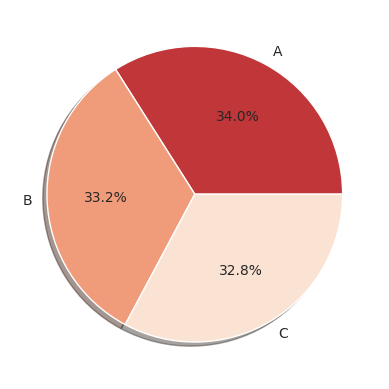

In [21]:
# number of unique values is small, which is appropriate with pie plot

pie_plot("Branch") # call function i create it in cell 11

**We can see :**

- We have 3 Branches "A", "B" and "C"
    - Branche `A` has largest Sales numbers
    - Branche `C` has fewest Sales numbers

### Discovering `Customer type` column

In [22]:
# see unique values

data["Customer type"].unique()

array(['Member', 'Normal'], dtype=object)

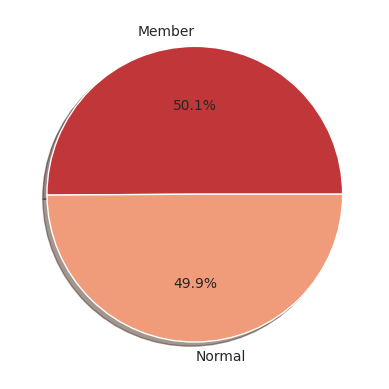

In [23]:
# number of unique values is small, which is appropriate with pie plot

pie_plot("Customer type") # call function i create it in cell 11

### From the above

- Most people come to branches has `member card`

### Discovering `Gender` column

In [24]:
# see unique values

data["Gender"].unique()

array(['Female', 'Male'], dtype=object)

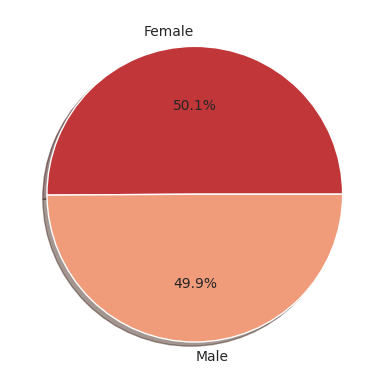

In [25]:
# number of unique values is small, which is appropriate with pie plot

pie_plot("Gender") # call function i create it in cell 11

### From the above

- Most Gender Come to branches is `female`

### Discovering `Product line` column

In [26]:
# see unique values

data["Product line"].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

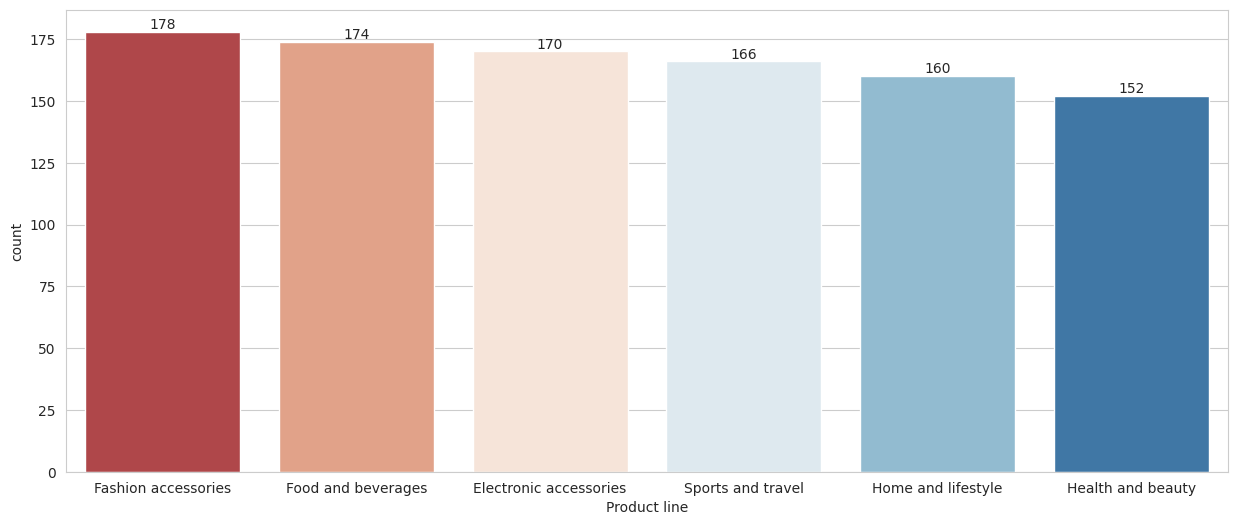

In [27]:
# number of unique values is relatively large, count plot more suitable for it

# first set figure size
plt.figure(figsize = (15,6))

# call function i create it in cell 10
count_plot("Product line")

**We can see :**

- Most sales in branches is **"Fashion accessories"**
- Lest sales in branches is **"Health and beauty"**

### Discovering `Payment` column

In [28]:
# see unique values

data["Payment"].unique()

array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

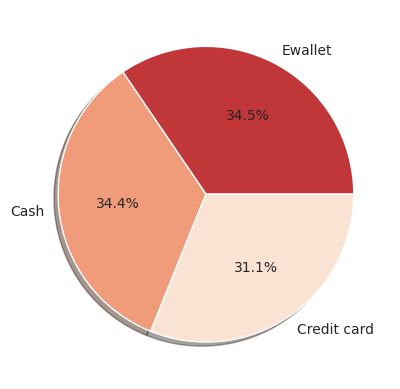

In [29]:
# number of unique values is small, which is appropriate with pie plot

pie_plot("Payment") # call function i create it in cell 11

### From the above

- Customers prefered to `Ewallet`,`cash payments`

### Discovering `Rating` column

In [30]:
# see unique values

data["Rating"].unique()

array([ 9.1,  9.6,  7.4,  8.4,  5.3,  4.1,  5.8,  8. ,  7.2,  5.9,  4.5,
        6.8,  7.1,  8.2,  5.7,  4.6,  6.9,  8.6,  4.4,  4.8,  5.1,  9.9,
        6. ,  8.5,  6.7,  7.7,  7.5,  7. ,  4.7,  7.6,  7.9,  6.3,  5.6,
        9.5,  8.1,  6.5,  6.1,  6.6,  5.4,  9.3, 10. ,  6.4,  4.3,  4. ,
        8.7,  9.4,  5.5,  8.3,  7.3,  4.9,  4.2,  9.2,  7.8,  5.2,  9. ,
        8.8,  6.2,  9.8,  9.7,  5. ,  8.9])

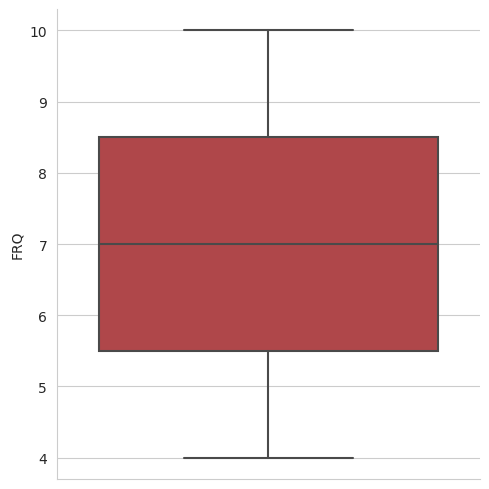

In [31]:
# see distribution

box_plot(y_axis = "Rating") # call function i create it in cell 12

### From the above

- Average rating across products is approximately `7`

### Discovering `Month` column

In [32]:
# see unique values

data["Month"].unique()

array([1, 3, 2])

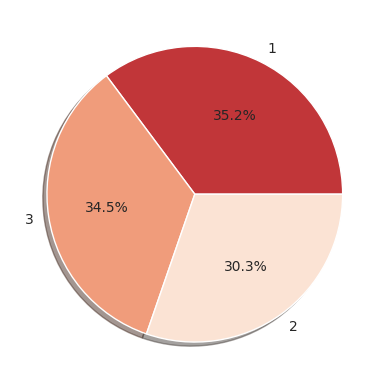

In [33]:
# number of unique values is small, which is appropriate with pie plot

pie_plot("Month") # call function i create it in cell 11

- Most sales in **"january"** month

## Bivariate Analysis & Visualizations

**1) There is relationship between gross income and customer ratings ?**

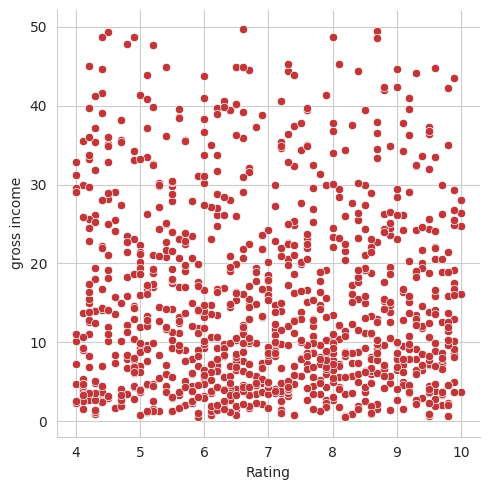

In [34]:
sns.relplot(x = "Rating", y = "gross income", data = data, kind = "scatter")
plt.show()

- **No relationship between rating and gross income**

**2) What is Gross Income of each branch ?**

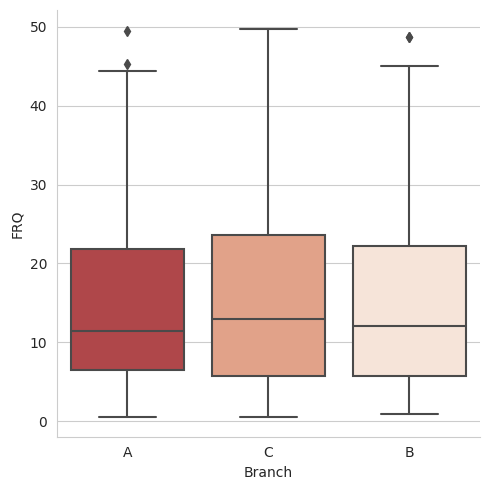

In [35]:
# call function i create it in cell 12

box_plot(x_axis = "Branch", y_axis = "gross income")



- Branch `C` stands out slightly with higher income compared to Branch `A` and `B`. Despite Branch `A` having slightly higher sales, it is Branch `C`  that emerges as the most profitable branch in terms of gross income

**3) See Gender come to branches**

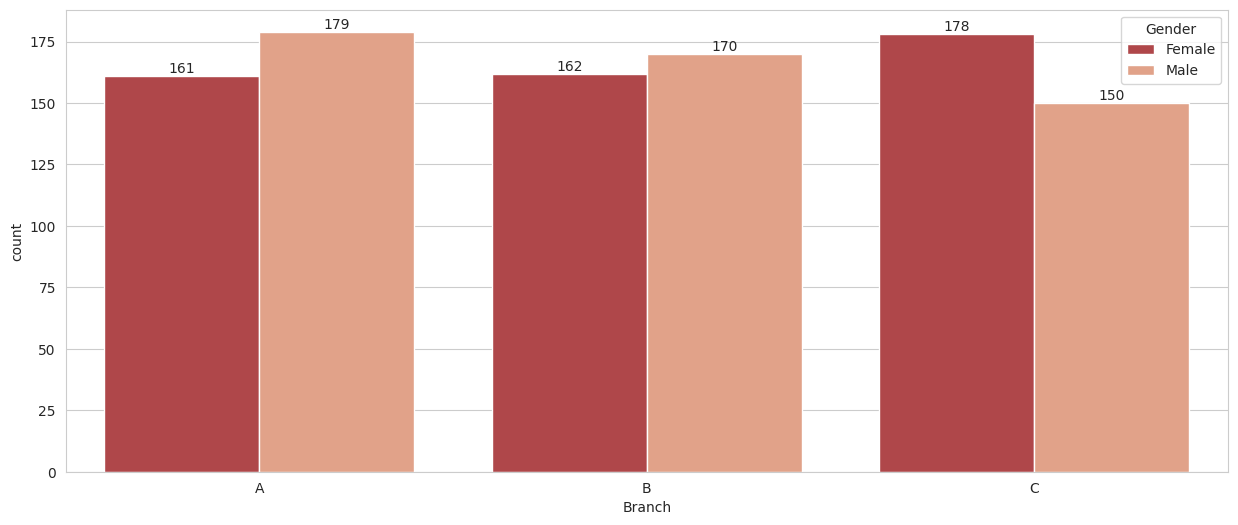

In [36]:
# first set figure size
plt.figure(figsize = (15,6))

# call function i create it in cell 10
count_plot(x_axis = "Branch", hue = "Gender")

- Branch `A`,`B` has males greater than females, but branch `C` has females greater than males

**4) What is male and female gross income in each branch ?**

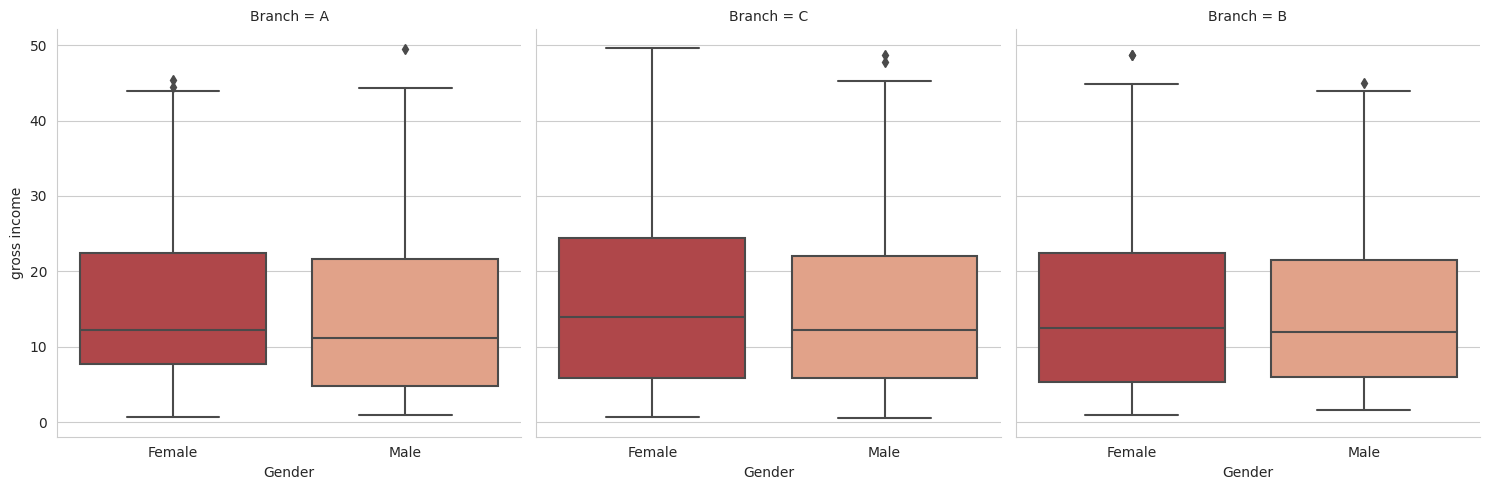

In [37]:
# call function i create it in cell 12

box_plot(x_axis = "Gender", y_axis = "gross income", col = "Branch")

- **"Female"** gross income greater than Male in each branch

**5) See sales product line in branches**

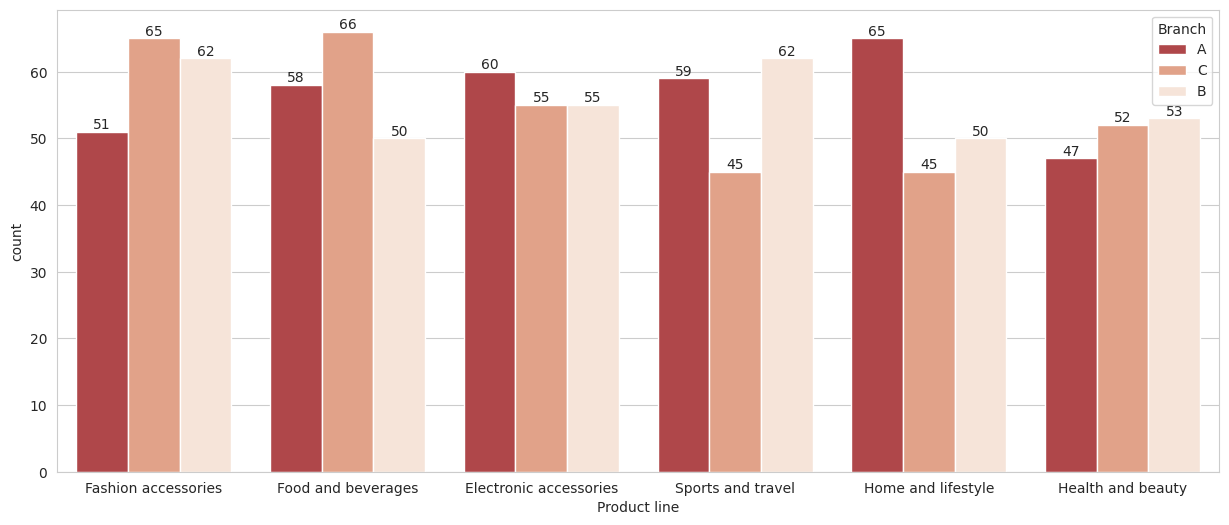

In [38]:
# first set figure size
plt.figure(figsize=(15,6))

# call function i create it in cell 10
count_plot(x_axis = "Product line", hue = "Branch")

### From above
- "Electronic accessories", "Home and lifestyle" is the most sales in branch A
- "Health and beauty", "Sports and travel" is the most sales in branch B
- "Food and beverages", "Fashion accessories" is the most sales in branch C

**6) What is number of customer type of each branch ?**

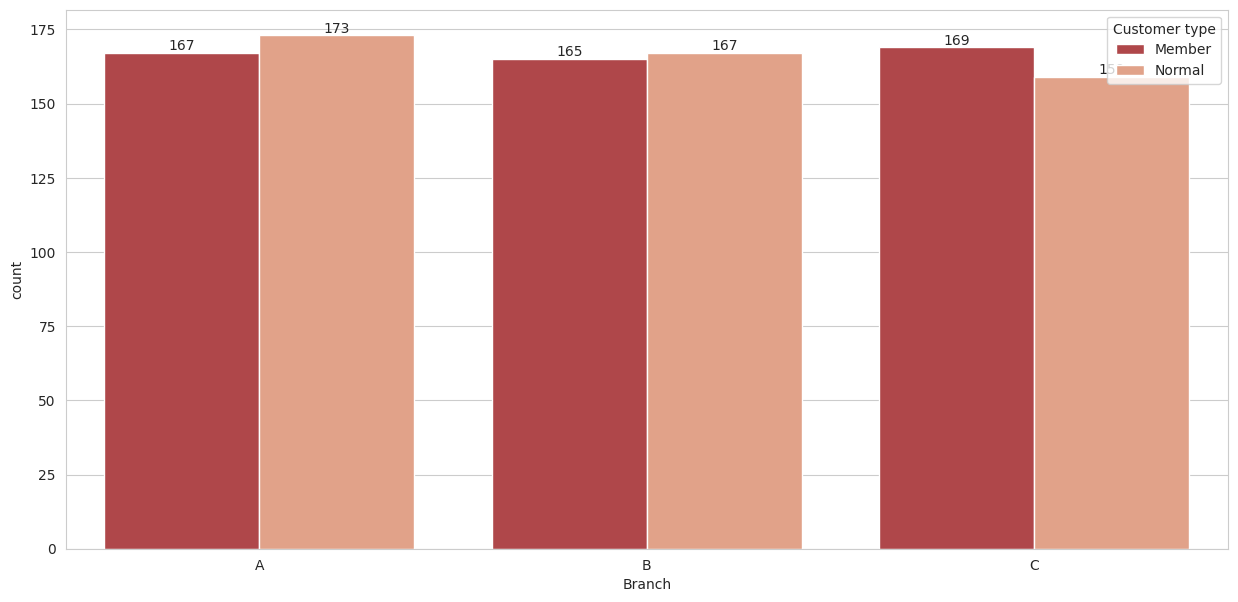

In [39]:
# first set figure size
plt.figure(figsize=(15,7))

# call function i create it in cell 10
count_plot(x_axis = "Branch", hue = "Customer type")

### From above
- Branch `A`, `Normal` customer greater than `Member`
- Branch `B`, `Normal` customer greater than `Member`
- Branch `C`, `Member` customer greater than `Normal`

#### `When  number of members in Branch increased,Total of gross income increased`

**7) What is relation between customer gender and product line ?**

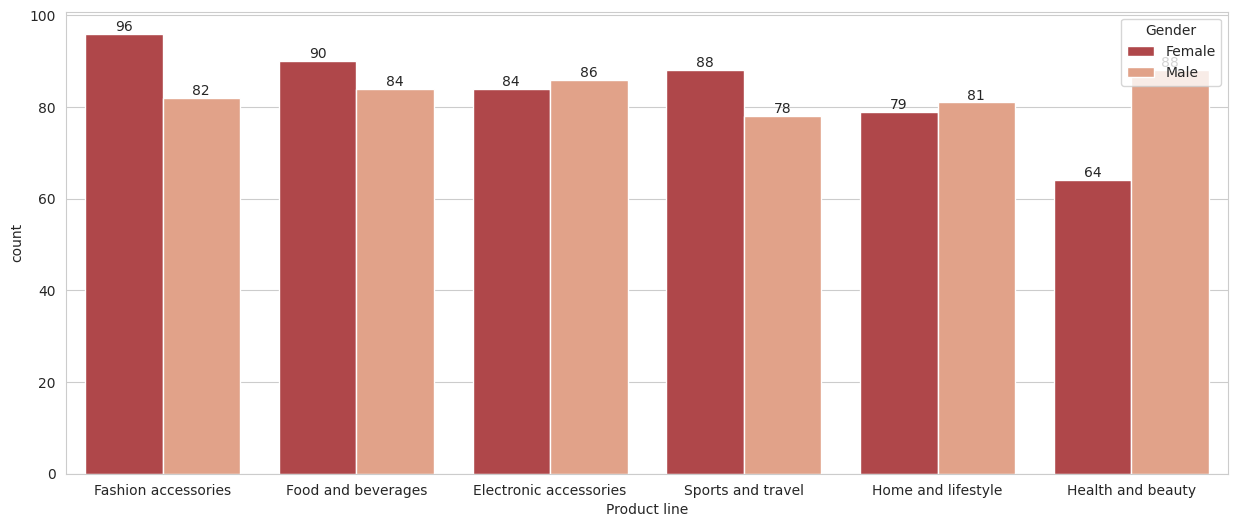

In [40]:
# first set figure size
plt.figure(figsize=(15,6))

# call function i create it in cell 10
count_plot(x_axis = "Product line", hue = "Gender")


####  When number of females increase, `Fashion accessories` Product line increase

#### When number of male increase,`Health and beauty` Product line increase


**8) Which product line have greater gross income ?**

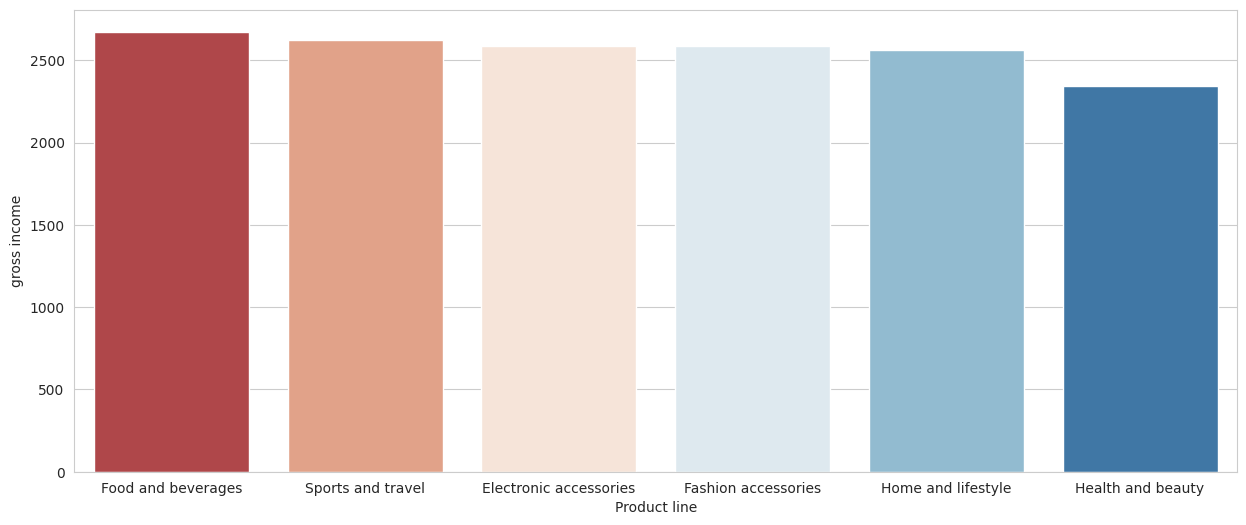

In [41]:
# 1- create products dataFrame
products = data.groupby("Product line")[["gross income"]].sum().sort_values(by = "gross income", ascending = False)

# 2- first set figure size
plt.figure(figsize=(15,6))

# 3- visualized products
sns.barplot(x = products.index, y = "gross income", data = products)
plt.show()

-  Gross income is highest in `food and beverages`

**9) What is month has greater gross income in each branch ?**

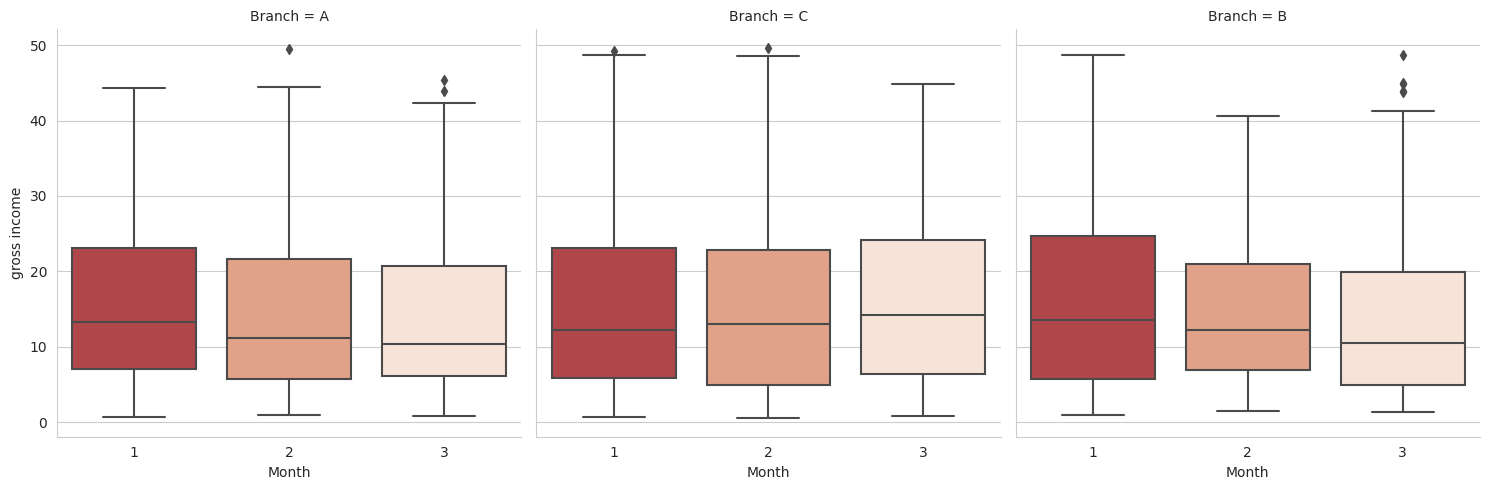

In [42]:
# call function i create it in cell 12

box_plot(x_axis = "Month", y_axis = "gross income", col = "Branch")

- "january" month has greater gross income

**10) What is greater sales  product line in each month ?**

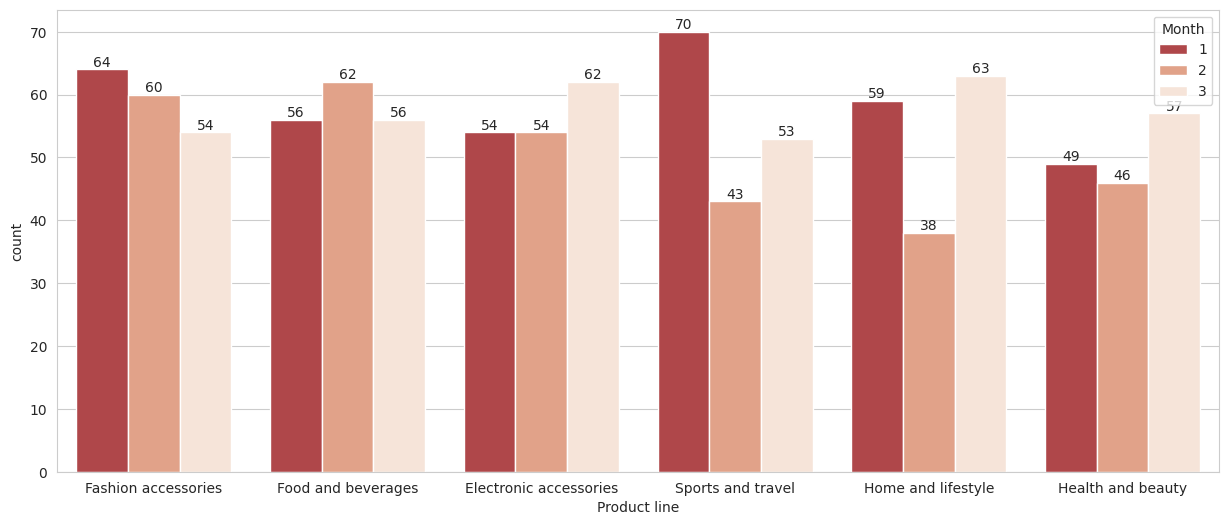

In [43]:
# first set figure size
plt.figure(figsize=(15,6))

# call function i create it in cell 10
count_plot(x_axis = "Product line", hue = "Month")

### From above
- #### 1. January month
  - Sports and travel, Fashion accessories is the most product line sales

- #### 2. March month
    - Electronic accessories, Home and lifestyle is the most product line sales

- #### 3. February month
    - Food and beverages, Fashion accessories is the most product line sales


## Conclusion

- #### Customer average rating of approximately `7`. there was no relationship between customer ratings and gross income

- #### Among the three branches, Branch `C` as the most profitable in terms of gross income, despite Branch `A` having slightly higher sales

- #### `Fashion Accessories` and `Food and Beverages` were the most products. Therefore, must focus on these categories, with electronic accessories

- #### The preferred payment method for customers was found to be `Ewallet` and `Cash`

- #### `Food and Beverage` proved to be the category generating the highest gross income overall

- #### Females  spend the most on `fashion accessories`, while males  preference for `health and beauty` products Females also spending on `sports and travel`, which contributed to the highest overall income

- #### `In the end, there was no relationship between customer ratings were not significantly related to any variable`